### 3 Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


### 5 How many rows and columns are in gdp_df
8219 rows and 4 columns

## What are the data types of each column?

In [3]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6 Drop the Value Footnotes column 

In [4]:
gdp_df.drop(columns = 'Value Footnotes')

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [6]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### 7. How many countries have data for all years? 

### below is to count how many unique years there are in the set

In [41]:
gdp_df['Year'].nunique()

34

In [40]:
gdp_df['Country'].value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [42]:
year_count=gdp_df['Country'].value_counts()

In [52]:
type(year_count)

pandas.core.series.Series

In [53]:
year_count=year_count.to_frame()

In [54]:
type(year_count)

pandas.core.frame.DataFrame

In [61]:
year_count = year_count.reset_index()

In [62]:
year_count

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [72]:
year_count.loc[year_count['count'] == gdp_df['Year'].nunique()]

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
223,Turkmenistan,34
224,Timor-Leste,34
225,Togo,34
226,Trinidad and Tobago,34


In [73]:
len(year_count.loc[year_count['count'] == gdp_df['Year'].nunique()])

228

Which countries are missing many years of data?

In [75]:
year_count.tail(20)

,Country,count
227,Tunisia,34
228,Lebanon,33
229,Tonga,33
230,Bhutan,33
231,Syrian Arab Republic,33
232,Somalia,33
233,Greenland,32
234,West Bank and Gaza,30
235,Serbia,29
236,Montenegro,27


Look at the number of observations per year. What do you notice?

In [79]:
obs_by_year=gdp_df['Year'].value_counts()

In [86]:
obs_by_year = obs_by_year.reset_index()

In [89]:
obs_by_year.sort_values(by='Year').reset_index(drop=True)

,Year,count
0,1990,233
1,1991,234
2,1992,234
3,1993,234
4,1994,235
5,1995,236
6,1996,236
7,1997,238
8,1998,238
9,1999,238


#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [96]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]

In [101]:
gdp_2020.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [ ]:
gdp_2020.sort

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

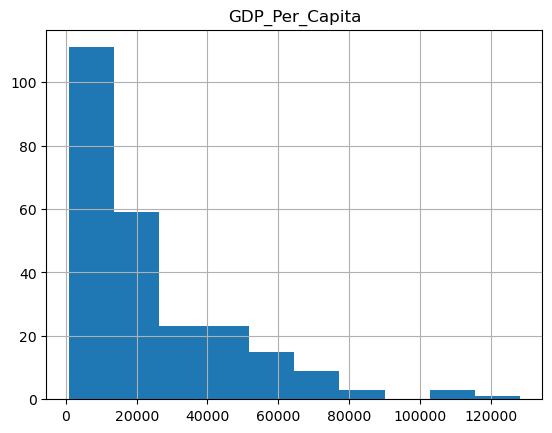

In [100]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

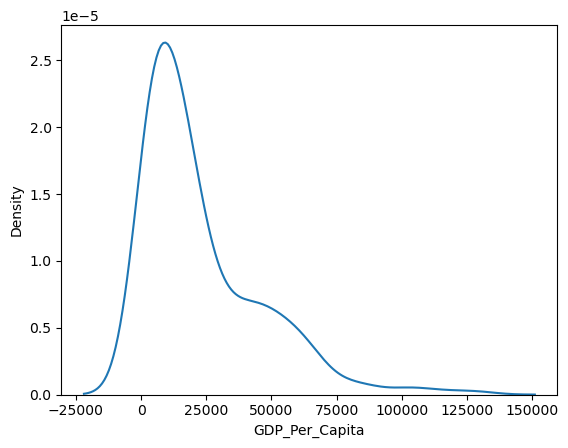

In [109]:
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

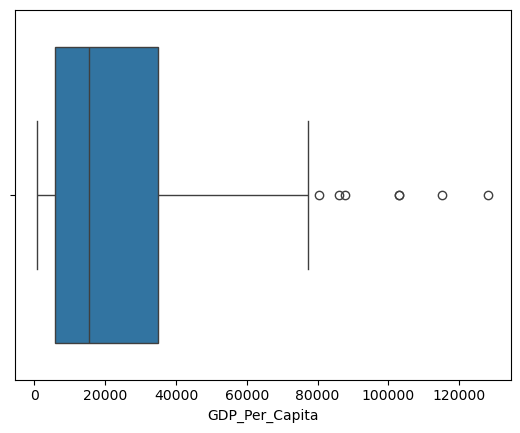

In [107]:
sns.boxplot(data=gdp_2020, x ='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

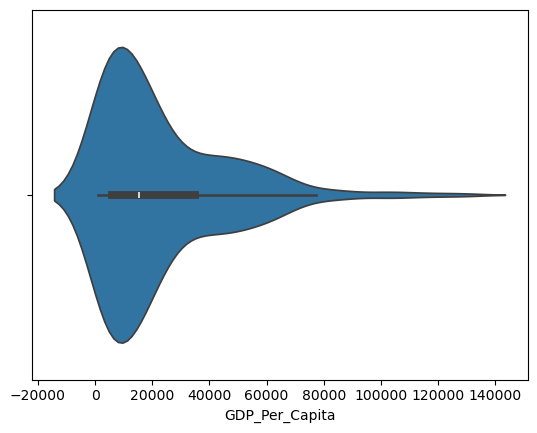

In [108]:
sns.violinplot(data =gdp_2020, x='GDP_Per_Capita')

There are way more countries with lower gdps than higher, which you can see from all of hte plots. The violin plot and the density plots have data going below 0, which isn't helpful in this data set. The box plot I think is best in terms of showing the data as a whole with the 25%,75% as well as outliers, which there are cleary a few.

#9. What was the median GDP per capita value in 2020?

In [112]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

#10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [133]:
gdp_decades=gdp_df.loc[((gdp_df.Year == 1990)|(gdp_df.Year == 2000)|(gdp_df.Year == 2010)|(gdp_df.Year == 2020))]

In [134]:
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


In [140]:
#another way to do the same thing
decades = [1990,2000,2010,2020]
gdp_decades_2 = gdp_df.loc[gdp_df['Year'].isin(decades)]

In [139]:
gdp_decades_2

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

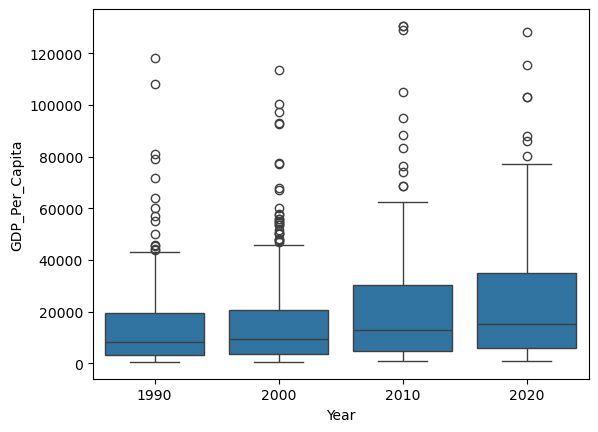

In [144]:
sns.boxplot(x = gdp_decades['Year'], y =gdp_decades['GDP_Per_Capita'])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

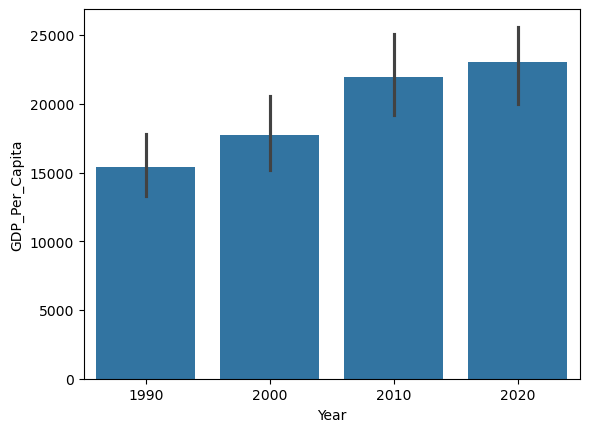

In [150]:
sns.barplot(x='Year', y='GDP_Per_Capita',data=gdp_decades)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

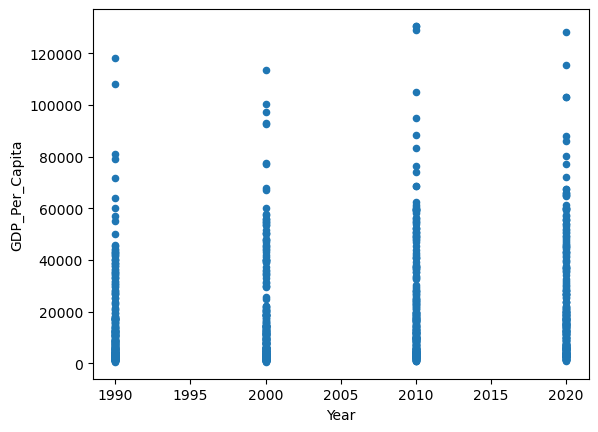

In [151]:
gdp_decades.plot(kind='scatter', x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

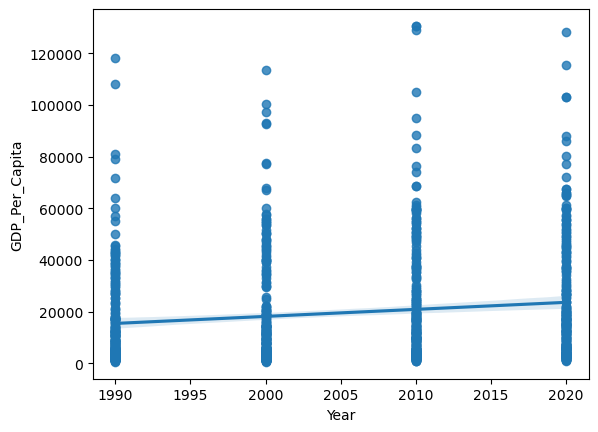

In [153]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])


GDP has slowly increased over time, which each graph shows in its own way.The barplot and boxplot are pretty clear. The scatterplot less so, but the version with the trend line helps.

#11.Which country was the first to have a GDP per capita greater than $100,000?

In [165]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year')
#either Brunei or United Arab Emirates

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [166]:
gdp_df.loc[gdp_df.Year == 2020].sort_values('GDP_Per_Capita', ascending =False)
#Luxembourg

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


In [173]:
gdp_df.loc[gdp_df.Country == 'Luxembourg'].sort_values('Year').reset_index(drop=True)

,Country,Year,GDP_Per_Capita
0,Luxembourg,1990,80947.492013
1,Luxembourg,1991,86774.421292
2,Luxembourg,1992,87187.534357
3,Luxembourg,1993,89638.568901
4,Luxembourg,1994,91804.800586
5,Luxembourg,1995,91820.682744
6,Luxembourg,1996,91845.705109
7,Luxembourg,1997,95617.478227
8,Luxembourg,1998,100738.594873
9,Luxembourg,1999,107512.224551


<Axes: xlabel='Year'>

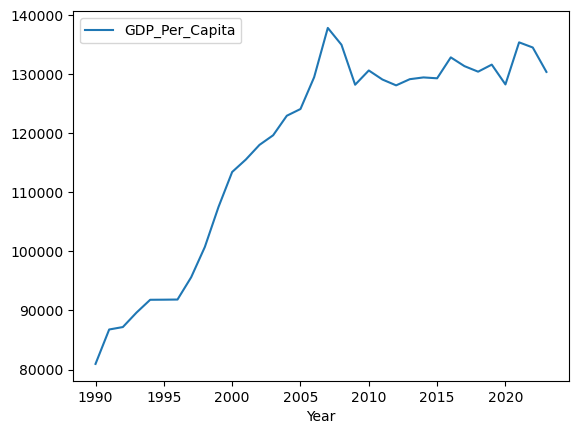

In [175]:
gdp_df.loc[gdp_df.Country == 'Luxembourg'].plot(x='Year',y='GDP_Per_Capita',kind='line')

